In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [23]:
df309 = pd.read_csv('real_309_5.csv')
df310 = pd.read_csv('real_310_5.csv')

In [24]:
df309.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5944 entries, 0 to 5943
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5944 non-null   int64 
 1   years        5944 non-null   int64 
 2   court        5943 non-null   object
 3   simplejudge  5944 non-null   object
 4   record       5944 non-null   object
 5   place        5944 non-null   object
 6   compromise   5944 non-null   object
 7   xword        5944 non-null   object
 8   education    5944 non-null   object
 9   mind         5944 non-null   object
 10  financial    5944 non-null   object
 11  support      5944 non-null   object
 12  attitude     5944 non-null   object
 13  confess      5944 non-null   object
 14  sequel       5944 non-null   object
 15  law          5944 non-null   object
 16  label        5944 non-null   int64 
dtypes: int64(3), object(14)
memory usage: 789.6+ KB


In [25]:
df310.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2516 non-null   int64 
 1   years        2516 non-null   int64 
 2   court        2516 non-null   object
 3   simplejudge  2516 non-null   object
 4   record       2516 non-null   object
 5   place        2516 non-null   object
 6   compromise   2516 non-null   object
 7   xword        2516 non-null   object
 8   education    2516 non-null   object
 9   mind         2516 non-null   object
 10  financial    2516 non-null   object
 11  support      2516 non-null   object
 12  attitude     2516 non-null   object
 13  confess      2516 non-null   object
 14  sequel       2516 non-null   object
 15  law          2516 non-null   object
 16  label        2516 non-null   int64 
dtypes: int64(3), object(14)
memory usage: 334.3+ KB


In [26]:
df309['court'].fillna(value='市區', inplace=True)

In [30]:
labelencoder = LabelEncoder() 
# 309
df309_2 = df309.copy(deep=True)
df309_2['simplejudge'] = labelencoder.fit_transform(df309_2['simplejudge']) 
df309_2['court'] = labelencoder.fit_transform(df309_2['court']) 
df309_2['record'] = labelencoder.fit_transform(df309_2['record']) 
df309_2['place'] = labelencoder.fit_transform(df309_2['place']) 
df309_2['compromise'] = labelencoder.fit_transform(df309_2['compromise']) 
df309_2['xword'] = labelencoder.fit_transform(df309_2['xword']) 
df309_2['education'] = labelencoder.fit_transform(df309_2['education']) 
df309_2['mind'] = labelencoder.fit_transform(df309_2['mind']) 
df309_2['financial'] = labelencoder.fit_transform(df309_2['financial']) 
df309_2['support'] = labelencoder.fit_transform(df309_2['support']) 
df309_2['attitude'] = labelencoder.fit_transform(df309_2['attitude']) 
df309_2['confess'] = labelencoder.fit_transform(df309_2['confess']) 
df309_2['law'] = labelencoder.fit_transform(df309_2['law'])
df309_2['sequel'] = labelencoder.fit_transform(df309_2['sequel']) 
# 310
df310_2 = df310.copy(deep=True)
df310_2['simplejudge'] = labelencoder.fit_transform(df310_2['simplejudge']) 
df310_2['court'] = labelencoder.fit_transform(df310_2['court']) 
df310_2['record'] = labelencoder.fit_transform(df310_2['record']) 
df310_2['place'] = labelencoder.fit_transform(df310_2['place']) 
df310_2['compromise'] = labelencoder.fit_transform(df310_2['compromise']) 
df310_2['xword'] = labelencoder.fit_transform(df310_2['xword']) 
df310_2['education'] = labelencoder.fit_transform(df310_2['education']) 
df310_2['mind'] = labelencoder.fit_transform(df310_2['mind']) 
df310_2['financial'] = labelencoder.fit_transform(df310_2['financial']) 
df310_2['support'] = labelencoder.fit_transform(df310_2['support']) 
df310_2['attitude'] = labelencoder.fit_transform(df310_2['attitude']) 
df310_2['confess'] = labelencoder.fit_transform(df310_2['confess']) 
df310_2['law'] = labelencoder.fit_transform(df310_2['law'])
df310_2['sequel'] = labelencoder.fit_transform(df310_2['sequel']) 

In [31]:
# X309 = df309_2.drop(['label','id','years','law'],axis=1)
# y309 = df309_2['label']
X310 = df310_2.drop(['label','id','years','law'],axis=1)
y310 = df310_2['label']

In [32]:
X310

,court,simplejudge,record,place,compromise,xword,education,mind,financial,support,attitude,confess,sequel
0,0,1,2,0,2,7,2,2,2,1,3,0,0
1,0,1,2,0,2,0,2,2,2,1,2,0,1
2,0,1,2,0,2,10,2,2,2,1,0,0,1
3,0,1,0,0,2,8,2,2,2,1,1,0,1
4,1,1,2,0,2,0,2,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,0,1,2,0,2,7,2,2,2,1,3,0,0
2512,0,0,2,0,1,0,2,2,2,1,2,0,1
2513,0,1,2,1,2,0,1,2,2,1,3,0,1
2514,0,0,2,0,2,4,2,2,2,1,2,0,0


In [33]:
X_test=X310
y_test=y310

In [34]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
y_test.value_counts()

In [ ]:
y_types = [5000,10000,30000,50000,100000]

In [78]:
# MDS
from sklearn.manifold import MDS
mds=MDS(n_components=2) 
mds.fit(X_test)
X_mds=mds.fit_transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_mds[y_test == i, 0], X_mds[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('310 MDS')
plt.show()

KeyboardInterrupt: 

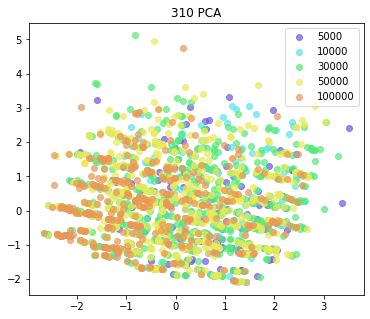

In [77]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_test)
X_PCA=pca.fit_transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_PCA[y_test == i, 0], X_PCA[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('310 PCA')
plt.show()

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x

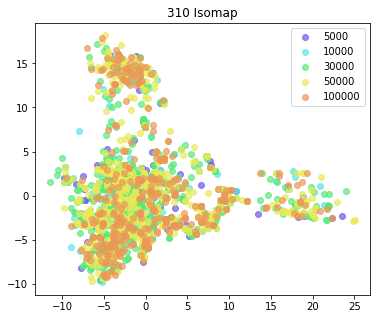

In [76]:
# Isomap
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(X_test)
X_iso=iso.transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_iso[y_test == i, 0], X_iso[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('310 Isomap')
plt.show()

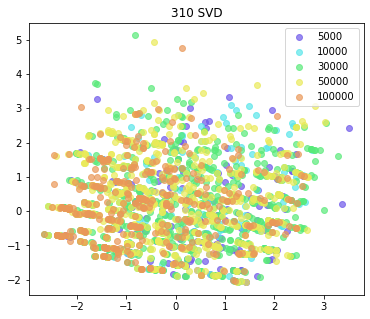

In [75]:
# SVD
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

svd = TruncatedSVD(2)
X_SVD = svd.fit_transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_SVD[y_test == i, 0], X_SVD[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('310 SVD')
plt.show()

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


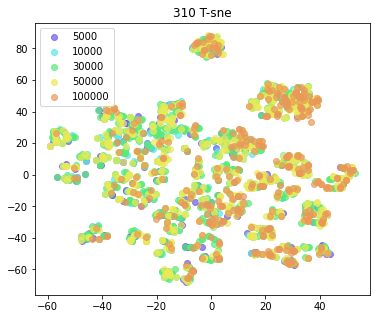

In [74]:
# T-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_test)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('310 T-sne')
plt.show()

In [79]:
X_test=X309
y_test=y309

In [80]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [90]:
y_test.value_counts()

5000      1856
3000      1606
300000     854
20000      817
10000      811
Name: label, dtype: int64

In [ ]:
y_types = [3000,5000,10000,20000,300000]

In [ ]:
# MDS
from sklearn.manifold import MDS
mds=MDS(n_components=2) 
mds.fit(X_test)
X_mds=mds.fit_transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_mds[y_test == i, 0], X_mds[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('309 MDS')
plt.show()

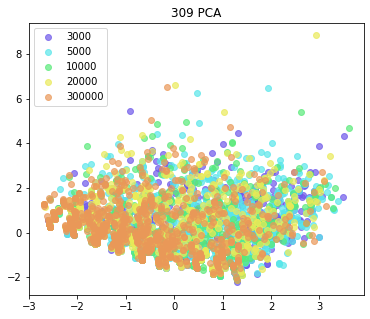

In [85]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_test)
X_PCA=pca.fit_transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_PCA[y_test == i, 0], X_PCA[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('309 PCA')
plt.show()

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 76 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, 

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

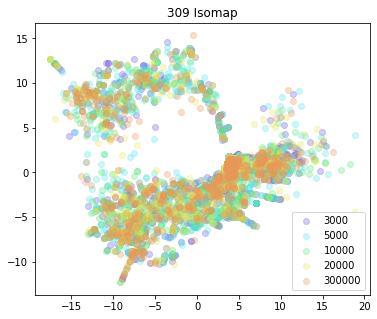

In [94]:
# Isomap
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(X_test)
X_iso=iso.transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_iso[y_test == i, 0], X_iso[y_test == i, 1], c=c, label=label,alpha=.3)
plt.legend()
plt.title('309 Isomap')
plt.show()

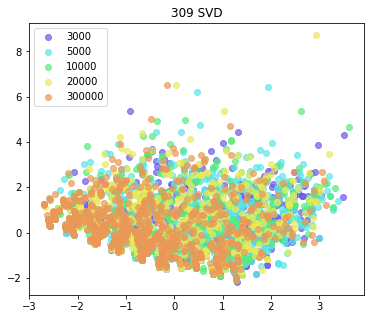

In [87]:
# SVD
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

svd = TruncatedSVD(2)
X_SVD = svd.fit_transform(X_test)
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_SVD[y_test == i, 0], X_SVD[y_test == i, 1], c=c, label=label,alpha=.7)
plt.legend()
plt.title('309 SVD')
plt.show()

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


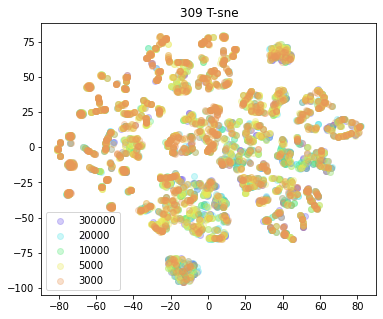

In [96]:
# T-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_test)
y_types = [300000,20000,10000,5000,3000]
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = '#6E58EA', '#58E6EA', '#58EA79', '#EAEA58', '#EA9858'
for i, c, label in zip(y_types, colors, y_types):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label,alpha=.3)
plt.legend()
plt.title('309 T-sne')
plt.show()